# Processamento de Dados Geoespaciais com GeoPandas

**Objetivo:** Este notebook vai explorar como manipular dados geoespaciais utilizando a biblioteca GeoPandas. Vamos abordar a leitura e escrita de dados, operações espaciais, geometrias básicas e como filtrar e agregar dados espaciais.

## 1. Introdução ao GeoPandas
GeoPandas é uma extensão da biblioteca Pandas, que adiciona suporte a dados geoespaciais. Com GeoPandas, podemos realizar operações geográficas de maneira eficiente e integrada.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install geopandas

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

## 2. Leitura e Escrita de Dados Geoespaciais

**Leitura de dados**


Vamos começar lendo arquivos de dados geoespaciais.

GeoPandas suporta vários formatos, incluindo Shapefiles, GeoJSON, e outros formatos vetoriais.

In [5]:
#Leitura de um shapefile
# gdf = gpd.read_file('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula01/BIOMAS/lm_bioma_250.shp')
gdf = gpd.read_file('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula01/BIOMAS/lm_bioma_250.shp', encoding='utf-8')
gdf.head()

Output hidden; open in https://colab.research.google.com to view.

**Escrita de dados**


Podemos também salvar dados manipulados em novos arquivos geoespaciais.

⚠
Recomenda-se salvar os arquivos em uma pasta diferente dos dados de entrada.

Vamos então criar uma nova pasta no drive.

In [6]:
import os
from pathlib import Path

In [7]:
if not os.path.exists('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula02/SAIDA'):
  os.makedirs('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula02/SAIDA')

Path('./').mkdir(parents=True, exist_ok=True)

In [ ]:
# Salvando o shapefile
gdf.to_file('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula02/SAIDA/lm_bioma_250.shp')

## 3. Geometrias Básicas: Pontos, Linhas, Polígonos

In [9]:
from shapely.geometry import Point, LineString, Polygon

O Shapely é uma biblioteca Python utilizada para a processamento e análise de geometrias no espaço euclidiano.

É útil em aplicações de geoprocessamento, onde é necessário trabalhar com formas geométricas como pontos, linhas, polígonos e suas relações espaciais.

Leia mais sobre a biblioteca shapely [aqui](https://shapely.readthedocs.io/en/stable/manual.html).

**Pontos**

In [10]:
#Criando um ponto utilizando Shapely
ponto = Point(1.0, 2.0)
print(f"Ponto: {ponto}")

Ponto: POINT (1 2)


In [11]:
type(ponto)

shapely.geometry.point.Point

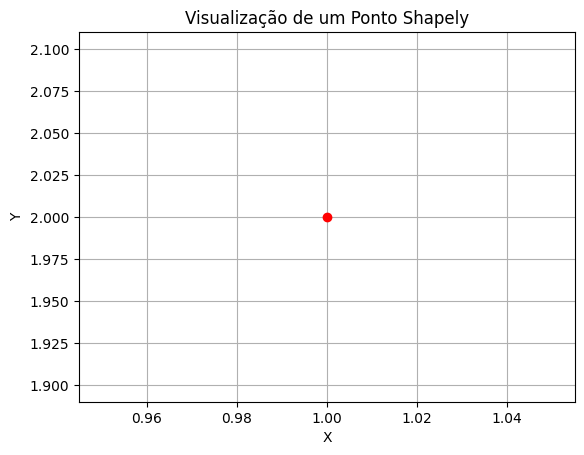

In [ ]:
# Plotando o ponto
plt.figure()
plt.plot(ponto.x, ponto.y, 'o', color='red')  # 'o' indica um ponto
plt.title('Visualização de um Ponto Shapely')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

Agora, vamos considerar coordenadas no estado de São Paulo.

In [ ]:
# Coordenadas geográficas (latitude, longitude) de 5 pontos no estado de São Paulo
pontos_SP = [
    Point(-23.5505, -46.6333),  # São Paulo, SP
    Point(-23.9675, -46.3286),  # Santos, SP
    Point(-22.3155, -49.0584),  # Bauru, SP
    Point(-22.9099, -47.0626),  # Campinas, SP
    Point(-20.8243, -49.3797)   # São José do Rio Preto, SP
]

In [ ]:
# Criando listas de latitudes e longitudes para plotagem
latitudes = [p.y for p in pontos_SP]
longitudes = [p.x for p in pontos_SP]

In [ ]:
print(latitudes)
print(longitudes)

[-46.6333, -46.3286, -49.0584, -47.0626, -49.3797]
[-23.5505, -23.9675, -22.3155, -22.9099, -20.8243]


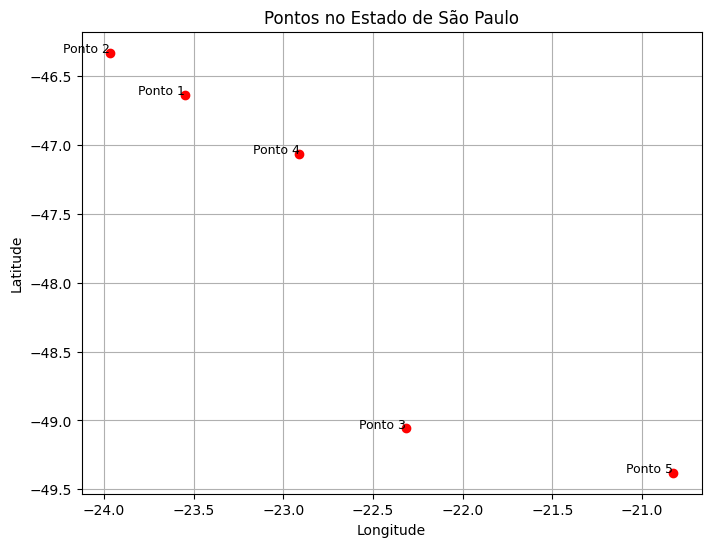

In [ ]:
# Plotando os pontos
plt.figure(figsize=(8, 6))
plt.scatter(longitudes, latitudes, color='red')

# Adicionando rótulos para cada ponto
for i, ponto in enumerate(pontos_SP):
    plt.text(ponto.x, ponto.y, f'Ponto {i+1}', fontsize=9, ha='right') #ha = horizontal alignment

plt.title("Pontos no Estado de São Paulo")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

Vamos usar os nomes dos municípios como rótulos.

In [ ]:
# Lista de nomes dos municípios
nomes_municipios = [
    "São Paulo",
    "Santos",
    "Bauru",
    "Campinas",
    "São José do Rio Preto"
]

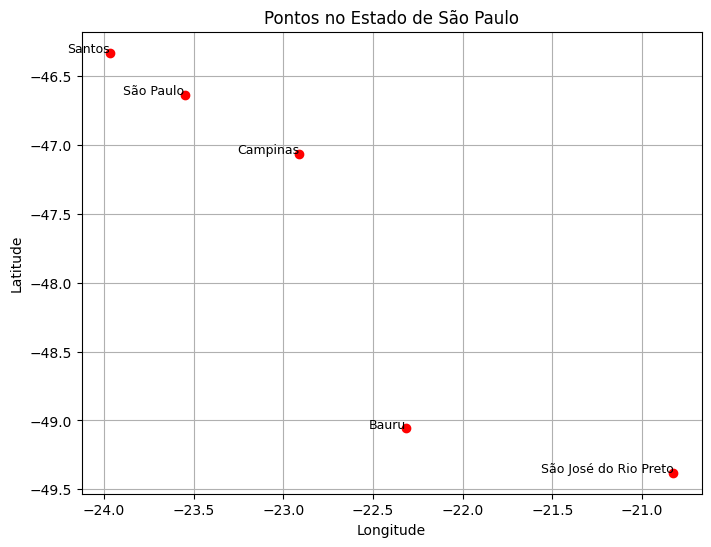

In [ ]:
# Plotando os pontos
plt.figure(figsize=(8, 6))
plt.scatter(longitudes, latitudes, color='red')

# Adicionando rótulos para cada ponto com os nomes dos municípios
for i, ponto in enumerate(pontos_SP):
    plt.text(ponto.x, ponto.y, nomes_municipios[i], fontsize=9, ha='right')

plt.title("Pontos no Estado de São Paulo")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

**Linhas**

In [12]:
# Criando uma linha a partir de uma lista de coordenadas
linha = LineString([(0, 0), (1, 2), (2, 2)])
print(f"Linha: {linha}")

Linha: LINESTRING (0 0, 1 2, 2 2)


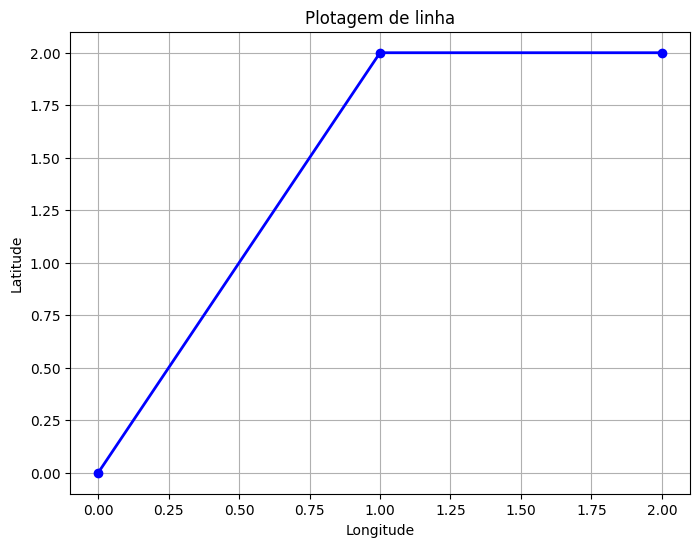

In [13]:
# Extrair as coordenadas da linha para plotagem
x, y = linha.xy

# Plotar a linha
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', linewidth=2, marker='o')

# Adicionar título e rótulos
plt.title('Plotagem de linha')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Vamos criar uma linha ligando os municípios no estado de São Paulo.

In [14]:
# Coordenadas geográficas (latitude, longitude) de algumas cidades em São Paulo
cidades_SP = [
    (-23.5505, -46.6333),  # São Paulo, SP
    (-23.9675, -46.3286),  # Santos, SP
    (-22.9099, -47.0626),  # Campinas, SP
    (-22.3155, -49.0584),  # Bauru, SP
    (-20.8243, -49.3797)   # São José do Rio Preto, SP
]

In [15]:
# Criar uma LineString conectando as cidades
linha_SP = LineString(cidades_SP)

In [16]:
print(linha_SP)

LINESTRING (-23.5505 -46.6333, -23.9675 -46.3286, -22.9099 -47.0626, -22.3155 -49.0584, -20.8243 -49.3797)


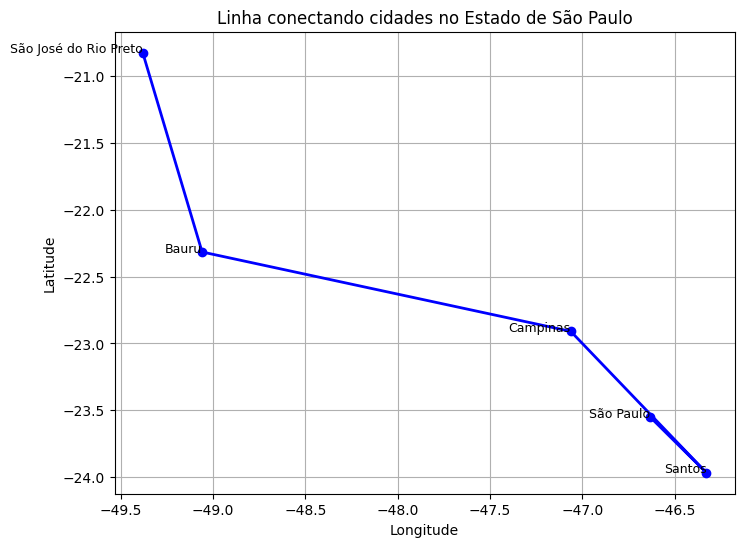

In [17]:
# Separar as coordenadas para plotagem
latitudes = [coord[0] for coord in cidades_SP]
longitudes = [coord[1] for coord in cidades_SP]

# Plotar a linha
plt.figure(figsize=(8, 6))
plt.plot(longitudes, latitudes, color='blue', linewidth=2, marker='o')

# Adicionar rótulos para cada cidade
nomes_municipios = ['São Paulo', 'Santos', 'Campinas', 'Bauru', 'São José do Rio Preto']
for i, nome in enumerate(nomes_municipios):
    plt.text(longitudes[i], latitudes[i], nome, fontsize=9, ha='right')

plt.title('Linha conectando cidades no Estado de São Paulo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

**Polígonos**

In [ ]:
# Criando um polígono a partir de uma lista de coordenadas
poligono = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
print(f"Polígono: {poligono}")

Polígono: POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))


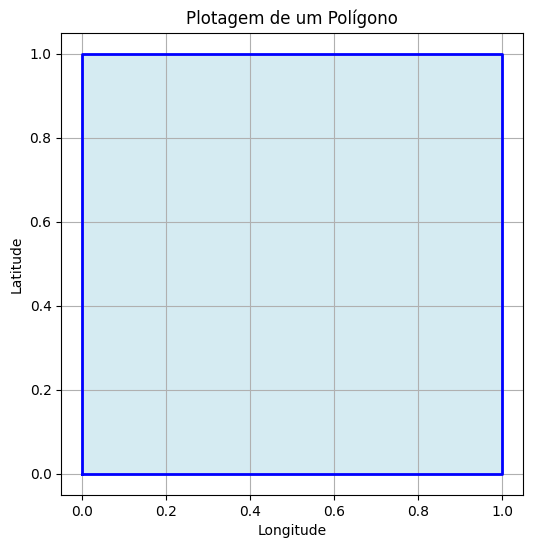

In [ ]:
# Extrair as coordenadas do polígono para plotagem
x, y = poligono.exterior.xy

# Plotar o polígono
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', linewidth=2)  # Linha do polígono
plt.fill(x, y, color='lightblue', alpha=0.5)  # Preenchimento do polígono

# Adicionar título e rótulos
plt.title("Plotagem de um Polígono")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Manter a proporção do polígono
plt.show()

Polígono com coordenadas no estado de Sâo Paulo

In [ ]:
# Coordenadas geográficas que delimitam uma área no estado de São Paulo
# Exemplo de coordenadas, ajustar conforme necessário
coordenadas_SP = [
    (-46.6333, -23.5505),  # São Paulo (Aproximado)
    (-47.0626, -22.9099),  # Campinas
    (-49.3797, -20.8243),  # São José do Rio Preto
    (-49.0584, -22.3155),  # Bauru
    (-46.3286, -23.9675),  # Santos
    (-46.6333, -23.5505)   # Fechar o polígono com o ponto inicial
]

# Criar o polígono
poligono_SP = Polygon(coordenadas_SP)

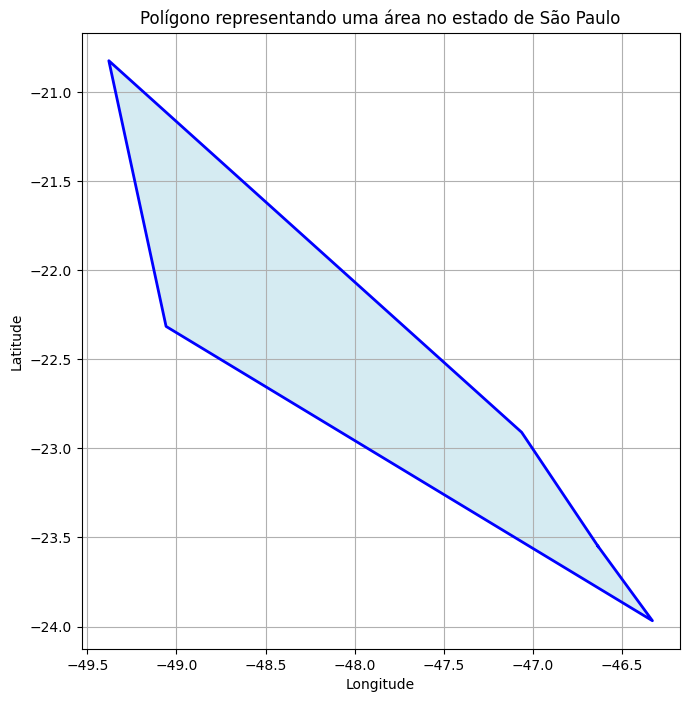

In [ ]:
# Extrair as coordenadas do polígono para plotagem
x, y = poligono_SP.exterior.xy

# Plotar o polígono
plt.figure(figsize=(10, 8))
plt.plot(x, y, color='blue', linewidth=2)  # Linha do polígono
plt.fill(x, y, color='lightblue', alpha=0.5)  # Preenchimento do polígono

# Adicionar título e rótulos
plt.title('Polígono representando uma área no estado de São Paulo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Mantém a proporção do polígono
plt.show()

✏
Abra um arquivo .shp como GeoDataframe e olhe a coluna 'geometry'.